In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
data_filename = "LAB2 - Data.csv"
tensile_data = pd.read_csv(data_filename)

In [154]:
init_dia = 6.33  # mm
l0 = 74.83  # mm
le = 25.21  # mm
final_dia = 2.78  # mm

In [155]:
a0 = np.pi*init_dia**2 / 4
print(f"Init area : {a0} mm^2")

Init area : 31.470040469356015 mm^2


In [156]:
af = np.pi*final_dia**2 / 4
print(f"Final area : {af} mm^2")

Final area : 6.069871166000838 mm^2


In [157]:
area_prec = 100*(a0-af)/a0
print(f"Precent reduciton in area : {area_prec} %")

Precent reduciton in area : 80.71222319554568 %


In [158]:
tensile_data.columns

Index(['Time', 'Load', 'Crosshead', 'Extensometer'], dtype='object')

In [159]:
tensile_data["Stress"] = tensile_data["Load"]/a0
tensile_data["Crosshead Strain"] = tensile_data["Crosshead"]/l0
tensile_data["Extensometer Strain"] = tensile_data["Extensometer"]/le

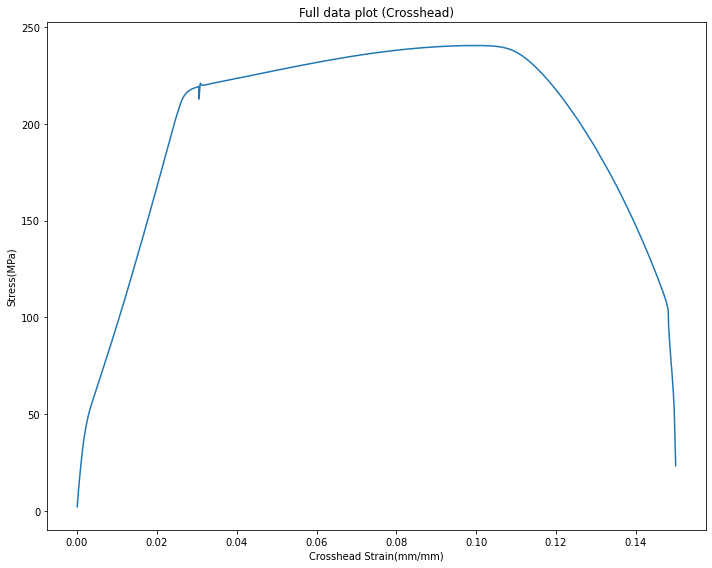

In [160]:
x = "Crosshead Strain"
y = "Stress"

fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111)
plt.plot(x, y, data=tensile_data)

title = "Full data plot (Crosshead)"
ax.set_xlabel(x + "(mm/mm)")
ax.set_ylabel(y + "(MPa)")
ax.set_title(title)
fig.tight_layout()
plt.savefig(f"{title}.png", bbox_inches="tight")

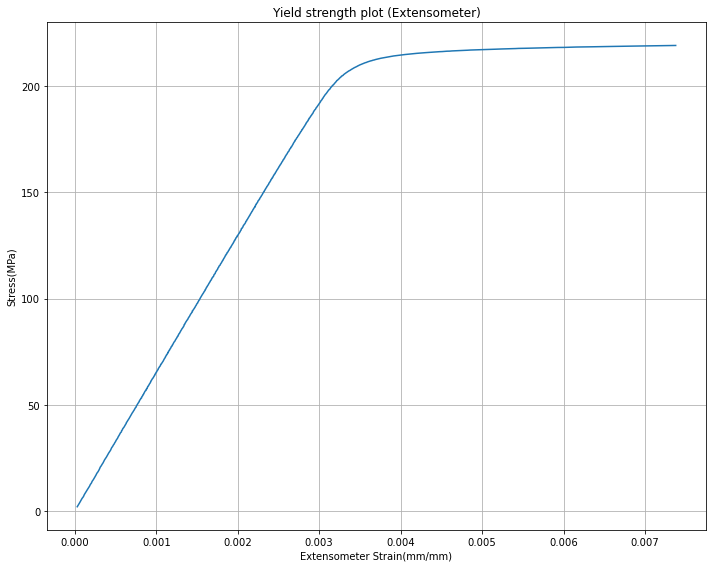

In [161]:
x = "Extensometer Strain"
y = "Stress"

fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111)
plt.plot(x, y, data=tensile_data[:900])
plt.grid()

title = "Yield strength plot (Extensometer)"
ax.set_xlabel(x + "(mm/mm)")
ax.set_ylabel(y + "(MPa)")
ax.set_title(title)
fig.tight_layout()
plt.savefig(f"{title}.png", bbox_inches="tight")

In [162]:
import statsmodels.api as sm

In [163]:
x = "Extensometer Strain"  # mm/mm
y = "Stress"  # MPa
linear_data = tensile_data[100:700]   # linear data only

In [164]:
model = sm.OLS(linear_data[y], linear_data[x])
res = model.fit()
res.params
print("E=", float(res.params), "MPa")
E = float(res.params)

E= 64680.96767304468 MPa


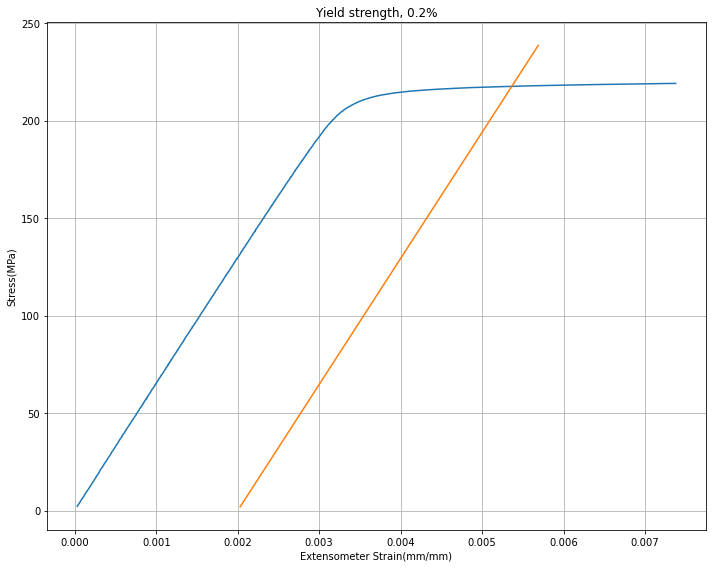

In [165]:
x = "Extensometer Strain"
y = "Stress"

ex_data = tensile_data[:900]

fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111)
plt.plot(x, y, data=ex_data)

eps_02 = np.linspace(min(ex_data[x]), max(ex_data[x])*0.5)
s_02 = eps_02*E

plt.plot(eps_02+0.002, s_02)

plt.grid()

# ax.set_xlim(0.003, 0.006)
# ax.set_ylim(205,225)

title = "Yield strength, 0.2%"
ax.set_xlabel(x + "(mm/mm)")
ax.set_ylabel(y + "(MPa)")
ax.set_title(title)
fig.tight_layout()
plt.savefig(f"{title}.png", bbox_inches="tight")

In [166]:
# yield strength estimated from graph
s_y = 217.5  # MPa


In [167]:
s_uts = max(tensile_data["Stress"])
print("Ultimate tensile strength=", s_uts, "MPa")

Ultimate tensile strength= 240.5434466273156 MPa


In [168]:
# Final elongation as a percent
final_strain = tensile_data.iloc[-1]["Crosshead Strain"]
final_elongation = 100*final_strain
print("Percent Elongation:", final_elongation, "%")

Percent Elongation: 14.997100093545368 %


In [169]:
proptional_stress_estimate = 190  # MPA
resilience = proptional_stress_estimate**2/(2*E)
print("U_r=", resilience, "MPa")

U_r= 0.27906199689591543 MPa


In [170]:
# modulus of toughness
u_t = (s_uts+s_y)/2 * final_strain
print("modulus of toughness=", u_t, "MPa")

modulus of toughness= 34.346617081311784 MPa


In [171]:
from sklearn.metrics import auc

x = "Crosshead Strain"
y = "Stress"
dropped = tensile_data.drop_duplicates(subset=x, keep='first')
sorted_data = dropped.sort_values(by=x, ascending=True)
toughness = auc(sorted_data[x], sorted_data[y])
print("toughness=", toughness, "MPa")

toughness= 29.738552382102377 MPa
